<a href="https://colab.research.google.com/github/Muhammadsulton1/ML/blob/main/russian_toxic_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [ ]:
# Подавление предупреждений
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving npl_russian.csv to npl_russian.csv


In [ ]:
data = pd.read_csv('npl_russian.csv')

In [ ]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


ВЗГЛЯНЕМ НА КОЛИЧЕСТВО ТОКСИЧНЫХ И НОРМАЛЬНЫХ КОММЕНТАРИЕВ 

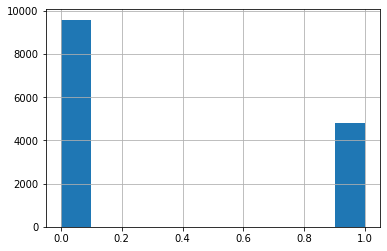

In [ ]:
data['toxic'].hist()

In [ ]:
data.shape

(14412, 2)

In [ ]:
data.describe(include='object')

,comment
count,14412
unique,14412
top,Всего 30-40 секунд такой беговой активности у ...
freq,1


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  14412 non-null  object 
 1   toxic    14412 non-null  float64
dtypes: float64(1), object(1)
memory usage: 225.3+ KB
None


ФУНКЦИЯ ДЛЯ ПОДСЧЕТА ПРОПУЩЕННЫХ ДАННЫХ В КОЛОНКАХ

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head()

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
#преобразуем целевую метку в формат без плавующей точки
data['toxic'] = data['toxic'].map(int)

In [ ]:
#просмотр токсичных комментариев
data[data['toxic']==1]

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
...,...,...
14404,"ЖЕНЩИНА это ВЕНЕЦ ТВОРЕНИЯ, помните это ваньки...",1
14405,Сейчас все авиакомпании мира вместе со специал...,1
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1


In [ ]:
#просмотр нормальных комментариев
data[data['toxic']==0]

,comment,toxic
6,В шапке были ссылки на инфу по текущему фильму...,0
12,"Почитайте посты у этого автора,может найдете ч...",0
17,Про графику было обидно) я так то проходил все...,0
28,https: pp.userapi.com c848520 v848520411 11627...,0
35,"Возьмём как пример Россию, западноевропейские ...",0
...,...,...
14392,"ТАСС, 21 марта. Премьер-министр Новой Зеландии...",0
14399,65 А чего так мало? Вот у гражданина был рейти...,0
14406,Потому что запад прошел эту хуйню еще пару сот...,0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0


In [ ]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [ ]:
import re 

In [ ]:
#применим функцию к нижниму регистру
def capitalizer(string: str) -> str:
    return string.lower()
# Применить функцию
data['comment'] = [capitalizer(string) for string in data['comment']]

In [ ]:
#удаление ссылок и разных символов
def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

In [ ]:
#удаление почтывых ссылок 
def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

In [ ]:
def remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

In [ ]:
def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [ ]:
def remove_numbers(s, keep=None):
    if keep:
        keep = set(str(x) for x in keep)
        return re.sub(r'\b\d+\b', lambda m: m.group() if m.group() in keep else '', s)
    else:
        # Shortcircuit the use of a set if there is no sequence to keep
        return re.sub(r'\b\d+\b', '', s)

In [ ]:
import unicodedata
data['text_clean'] = data['comment'].apply(lambda x: remove_emails(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_urls(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_rt(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_special_chars(x))
data['text_clean'] = data['text_clean'].apply(lambda s: remove_numbers(s))

In [ ]:
data.head()

,comment,toxic,text_clean
0,"верблюдов-то за что? дебилы, бл...\n",1,верблюдовто за что дебилы бл
1,"хохлы, это отдушина затюканого россиянина, мол...",1,хохлы это отдушина затюканого россиянина мол в...
2,собаке - собачья смерть\n,1,собаке собачья смерть
3,"страницу обнови, дебил. это тоже не оскорблени...",1,страницу обнови дебил это тоже не оскорбление ...
4,"тебя не убедил 6-страничный пдф в том, что скр...",1,тебя не убедил 6страничный пдф в том что скрип...


In [ ]:
data['comment'][1]

'хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. если бы хохлов не было, кисель их бы придумал.\n'

ТОККЕНИЗАЦИЯ ПО СЛОВАМ НАШИХ КОММЕНТАРИЕВ

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#токенизация по словам текста
data = data.assign(text_tokenize = data['text_clean'].apply(word_tokenize))

In [ ]:
data.head()

,comment,toxic,text_clean,text_tokenize
0,"верблюдов-то за что? дебилы, бл...\n",1,верблюдовто за что дебилы бл,"[верблюдовто, за, что, дебилы, бл]"
1,"хохлы, это отдушина затюканого россиянина, мол...",1,хохлы это отдушина затюканого россиянина мол в...,"[хохлы, это, отдушина, затюканого, россиянина,..."
2,собаке - собачья смерть\n,1,собаке собачья смерть,"[собаке, собачья, смерть]"
3,"страницу обнови, дебил. это тоже не оскорблени...",1,страницу обнови дебил это тоже не оскорбление ...,"[страницу, обнови, дебил, это, тоже, не, оскор..."
4,"тебя не убедил 6-страничный пдф в том, что скр...",1,тебя не убедил 6страничный пдф в том что скрип...,"[тебя, не, убедил, 6страничный, пдф, в, том, ч..."


УДАЛЕНИЕ СТОП-СЛОВ 

In [ ]:
#удаление стоп слов
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('russian')

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
data.head()

,comment,toxic,text_clean,text_tokenize
0,"верблюдов-то за что? дебилы, бл...\n",1,верблюдовто за что дебилы бл,"[верблюдовто, дебилы, бл]"
1,"хохлы, это отдушина затюканого россиянина, мол...",1,хохлы это отдушина затюканого россиянина мол в...,"[хохлы, это, отдушина, затюканого, россиянина,..."
2,собаке - собачья смерть\n,1,собаке собачья смерть,"[собаке, собачья, смерть]"
3,"страницу обнови, дебил. это тоже не оскорблени...",1,страницу обнови дебил это тоже не оскорбление ...,"[страницу, обнови, дебил, это, оскорбление, до..."
4,"тебя не убедил 6-страничный пдф в том, что скр...",1,тебя не убедил 6страничный пдф в том что скрип...,"[убедил, 6страничный, пдф, скрипалей, отравила..."


СТЕМИНГ ДАННЫХ

In [ ]:
#стемминг 
import nltk
from nltk.stem import SnowballStemmer

In [ ]:
snowball = SnowballStemmer("russian")

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [snowball.stem(y) for y in x])

ЛЕММИТИЗАЦИЯ ДАННЫХ

In [ ]:
#лемитизация слов
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [lemmatizer.lemmatize(y, pos='v') for y in x])

In [ ]:
data.head()

,comment,toxic,text_clean,text_tokenize
0,"верблюдов-то за что? дебилы, бл...\n",1,верблюдовто за что дебилы бл,"[верблюдовт, дебил, бл]"
1,"хохлы, это отдушина затюканого россиянина, мол...",1,хохлы это отдушина затюканого россиянина мол в...,"[хохл, эт, отдушин, затюкан, россиянин, мол, в..."
2,собаке - собачья смерть\n,1,собаке собачья смерть,"[собак, собач, смерт]"
3,"страницу обнови, дебил. это тоже не оскорблени...",1,страницу обнови дебил это тоже не оскорбление ...,"[страниц, обнов, деб, эт, оскорблен, доказа, ф..."
4,"тебя не убедил 6-страничный пдф в том, что скр...",1,тебя не убедил 6страничный пдф в том что скрип...,"[убед, 6страничн, пдф, скрипал, отрав, росс, а..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = data.assign(text_str = data['text_tokenize'].apply(str))

In [ ]:
data.head()

,comment,toxic,text_clean,text_tokenize,text_str
0,"верблюдов-то за что? дебилы, бл...\n",1,верблюдовто за что дебилы бл,"[верблюдовт, дебил, бл]","['верблюдовт', 'дебил', 'бл']"
1,"хохлы, это отдушина затюканого россиянина, мол...",1,хохлы это отдушина затюканого россиянина мол в...,"[хохл, эт, отдушин, затюкан, россиянин, мол, в...","['хохл', 'эт', 'отдушин', 'затюкан', 'россияни..."
2,собаке - собачья смерть\n,1,собаке собачья смерть,"[собак, собач, смерт]","['собак', 'собач', 'смерт']"
3,"страницу обнови, дебил. это тоже не оскорблени...",1,страницу обнови дебил это тоже не оскорбление ...,"[страниц, обнов, деб, эт, оскорблен, доказа, ф...","['страниц', 'обнов', 'деб', 'эт', 'оскорблен',..."
4,"тебя не убедил 6-страничный пдф в том, что скр...",1,тебя не убедил 6страничный пдф в том что скрип...,"[убед, 6страничн, пдф, скрипал, отрав, росс, а...","['убед', '6страничн', 'пдф', 'скрипал', 'отрав..."


In [ ]:
#выбираем 'text_str' потому что он очищеный приведен к начальной форме удалены стоп слова проведена лексимизация текста итп 
X = data['text_str']
y = data['toxic']

МЕШОК СЛОВ

In [ ]:
vectorizer = CountVectorizer()
# подгоняем модель под векторизацию
vectorizer.fit(X)
# преобразуем нашу разряженную матрицу 
X = vectorizer.transform(X)
print('размер разряженной матрицы: ', X.shape)
print('количество ненулевых вхождений: ', X.nnz)

размер разряженной матрицы:  (14412, 35852)
количество ненулевых вхождений:  222621


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier

In [ ]:
#разбиение на тестовый и тренировочный набор данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

БАЗОВАЯ КЛАССИФИКАЦИОННАЯ МОДЕЛЬ

In [ ]:
dummy = DummyClassifier(strategy='uniform', random_state=100)

In [ ]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5026366916458507

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [ ]:
logit = LogisticRegression(penalty='l2', C = 2.7825594022071245)

In [ ]:
model_logit = logit.fit(X_train,y_train)

In [ ]:
predictions_logit = model_logit.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test,predictions_logit)

0.7674841053587648

In [ ]:
print(precision_score(y_test,predictions_logit))
print(recall_score(y_test,predictions_logit))

0.8341559723593287
0.7106812447434819


АДАБУСТ КЛАССИФАЙР

In [ ]:
adaboost = AdaBoostClassifier(random_state= 120)

In [ ]:
model_adaboost = adaboost.fit(X_train, y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_adaboost = model_adaboost.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_adaboost,average='micro')

0.7732445184568416

In [ ]:
print(precision_score(y_test,predictions_adaboost))
print(recall_score(y_test,predictions_adaboost))

0.8444444444444444
0.383515559293524


К-БЛИЖАЙШИХ СОСЕДЕЙ

In [ ]:
# n =3  уже подобранное число соседа
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
# предсказать значения тестовой выборки
predictions_knn = knn.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_knn,average='micro')

0.7113516514016097

In [ ]:
print(precision_score(y_test,predictions_knn))
print(recall_score(y_test,predictions_knn))

0.6867167919799498
0.2304457527333894


МЕТОД ОПОРНО МАШИННЫХ ВЕКТОРОВ

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
model_svc = svc.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_svc = model_svc.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_svc,average='micro')

0.8268109908409659

In [ ]:
print(precision_score(y_test,predictions_svc))
print(recall_score(y_test,predictions_svc))

0.8907330567081605
0.5416316232127838


ДЕРЕВЬЯ РЕШЕНИЙ

In [ ]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy', random_state = 244)

In [ ]:
model_tree = decisiontree.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_tree = model_tree.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_tree,average='micro')

0.7760199833472107

In [ ]:
print(precision_score(y_test,predictions_tree))
print(recall_score(y_test,predictions_tree))

0.6826003824091779
0.6005046257359126


ПОЛИНОМИАЛЬНЫЙ БАЙЕСС

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier = MultinomialNB()
X_class = X_train.toarray()

In [ ]:
model_bayes = classifier.fit(X_class, y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_bayes = model_bayes.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_bayes,average='micro')

0.8870385789619761

In [ ]:
print(precision_score(y_test,predictions_bayes))
print(recall_score(y_test,predictions_bayes))

0.8441901408450704
0.8065601345668629


БЕРНУЛЛИЕВ БАЙЕСС

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
classifier_bernulli = BernoulliNB()

In [ ]:
model_bernulli = classifier_bernulli.fit(X_class,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_bernulli = model_bernulli.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_bernulli,average='micro')

0.8820427421593117

In [ ]:
print(precision_score(y_test,predictions_bernulli))
print(recall_score(y_test,predictions_bernulli))

0.8666026871401151
0.7594617325483599


СЛУЧАЙНЫЕ ЛЕСА

In [ ]:
# создание модели случайного леса
rfc = RandomForestClassifier(criterion = 'entropy',oob_score=True,n_jobs=-1, random_state=105)
# начинаем подгонку модели на тренировачных данных
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=105, verbose=0,
                       warm_start=False)

In [ ]:
# предсказать значения тестовой выборки
predictions_rfc = rfc.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test,predictions_rfc)

0.681701691440287

In [ ]:
print(precision_score(y_test,predictions_rfc))
print(recall_score(y_test,predictions_rfc))

0.8727034120734908
0.5592935239697224


ОПТИМИЗАЦИЯ АЛГОРИТМОВ - ПОДБОР ГИППЕРПАРАМЕТРОВ

In [ ]:
from sklearn.model_selection import GridSearchCV

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [ ]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)
hyperparametrs = dict(C=C, penalty=penalty)

In [ ]:
grid_search_logit = GridSearchCV(logit, hyperparametrs, cv = 5, verbose = 0)

In [ ]:
best_model_logit = grid_search_logit.fit(X_train, y_train)

In [ ]:
print('Лучший штраф:', best_model_logit.best_estimator_.get_params()['penalty'])
print('Лучший C:', best_model_logit.best_estimator_.get_params()['C'])

Лучший штраф: l2
Лучший C: 2.7825594022071245


К-БЛИЖАЙШИХ СОСЕДЕЙ

In [ ]:
n_neighbors = range(1,11)
param_grid = {'n_neighbors':n_neighbors,}

In [ ]:
gs = GridSearchCV(knn, param_grid, cv = 5, verbose=1, n_jobs=-1)

In [ ]:
best_model_knn = gs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.0s finished


In [ ]:
best_model_knn.best_params_

{'n_neighbors': 9}

МЕТОД МАШИННО ОПОРНЫХ ВЕКТОРОВ

In [ ]:
param_grid_svm = {'C': range(1,21,2),
                  'gamma': [1,0.1, 0.01, 0.001, 0.0001],
                  'kernel':['rbf','linear','poly','sigmoid']}

In [ ]:
grid_svm = GridSearchCV(svc, param_grid_svm,cv=5, verbose=3, n_jobs=-1)

In [ ]:
best_model_svm = grid_svm.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 90.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 142.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 179.7min finished


In [ ]:
best_model_svm.best_params_

{'C': 15, 'gamma': 0.01, 'kernel': 'rbf'}